# LGBTIQ-rights Dataset Cleaning Steps

## LGBTIQ+-Specific Datasets

**First, we will examine how many unique years and countries are included across the different datasets.**

## Python Code to Analyze Each Dataset

In [1]:
import pandas as pd

# Function to summarize unique years and countries
def summarize_years_and_countries(df, dataset_name):
    return pd.DataFrame({
        "Dataset": [dataset_name],
        "Unique Years": [df["Year"].nunique()],
        "Unique Countries": [df["Entity"].nunique()]
    })



# Censorship of LGBTIQ Issues
df_censorship = pd.read_csv("../data/raw/LGBTIQ-rights/censorship-of-lgbtiq-issues/censorship-of-lgbtiq-issues.csv")
censorship_summary = summarize_years_and_countries(df_censorship, "Censorship of LGBTIQ Issues")

# Employment Discrimination
df_employment_discrimination = pd.read_csv("../data/raw/LGBTIQ-rights/employment-discrimination/employment-discrimination-lgbt-equaldex.csv")
employment_discrimination_summary = summarize_years_and_countries(df_employment_discrimination, "Employment Discrimination")

# Economic Inequality (Gini Index)
df_gini = pd.read_csv("../data/raw/LGBTIQ-rights/economic-inequality-gini-index/economic-inequality-gini-index.csv")

gini_summary = summarize_years_and_countries(df_gini, "Economic Inequality (Gini Index)")

# GDP per Capita
df_gdp = pd.read_csv("../data/raw/LGBTIQ-rights/gdp-per-capita/gdp-per-capita-worldbank.csv")
gdp_summary = summarize_years_and_countries(df_gdp, "GDP per Capita")

# Government Expenditure on Education
df_education = pd.read_csv("../data/raw/LGBTIQ-rights/government-expenditure-on-education/total-government-expenditure-on-education-gdp.csv")
education_summary = summarize_years_and_countries(df_education, "Government Education Expenditure")

# Gender-Affirming Care
df_gender_care = pd.read_csv("../data/raw/LGBTIQ-rights/gender-affirming-care/gender-affirming-care.csv")
gender_care_summary = summarize_years_and_countries(df_gender_care, "Gender-Affirming Care")

# Same-Sex Marriage Rights
df_marriage = pd.read_csv("../data/raw/LGBTIQ-rights/marriage-same-sex-partners/marriage-same-sex-partners-equaldex.csv")
marriage_summary = summarize_years_and_countries(df_marriage, "Same-Sex Marriage")

# Legal Gender Change Rights
df_legal_gender = pd.read_csv("../data/raw/LGBTIQ-rights/right-to-change-legal-gender/right-to-change-legal-gender-equaldex.csv")
legal_gender_summary = summarize_years_and_countries(df_legal_gender, "Legal Gender Change")

def summarize_countries_per_year(df, dataset_name):
    return (
        df.groupby("Year")["Entity"]
        .nunique()
        .reset_index(name="num_countries")
        .assign(Dataset=dataset_name)
    )



censorship_summary = summarize_countries_per_year(df_censorship, "Censorship of LGBTIQ Issues")
employment_summary = summarize_countries_per_year(df_employment_discrimination, "Employment Discrimination")
gini_summary = summarize_countries_per_year(df_gini, "Economic Inequality (Gini Index)")
gdp_summary = summarize_countries_per_year(df_gdp, "GDP per Capita")
education_summary = summarize_countries_per_year(df_education, "Government Education Expenditure")
gender_care_summary = summarize_countries_per_year(df_gender_care, "Gender-Affirming Care")
marriage_summary = summarize_countries_per_year(df_marriage, "Same-Sex Marriage")
legal_gender_summary = summarize_countries_per_year(df_legal_gender, "Legal Gender Change")

# Combine
summary_all = pd.concat([
    censorship_summary,
    employment_summary,
    gini_summary,
    gdp_summary,
    education_summary,
    gender_care_summary,
    marriage_summary,
    legal_gender_summary
], ignore_index=True)

# Pivot
summary_pivot = summary_all.pivot_table(
    index="Dataset",
    columns="Year",
    values="num_countries",
    fill_value=0
).reset_index()

summary_pivot


Year,Dataset,1870,1913,1937,1950,1951,1952,1953,1954,1955,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,Censorship of LGBTIQ Issues,0.0,0.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,...,34.0,37.0,37.0,40.0,41.0,43.0,46.0,48.0,50.0,194.0
1,Economic Inequality (Gini Index),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,87.0,83.0,96.0,82.0,70.0,75.0,28.0,4.0,0.0,0.0
2,Employment Discrimination,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,63.0,66.0,73.0,78.0,81.0,84.0,86.0,87.0,88.0,183.0
3,GDP per Capita,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,213.0,213.0,213.0,213.0,213.0,213.0,212.0,206.0,0.0,0.0
4,Gender-Affirming Care,0.0,0.0,0.0,9.0,9.0,9.0,9.0,9.0,9.0,...,66.0,67.0,70.0,71.0,75.0,76.0,79.0,81.0,83.0,164.0
5,Government Education Expenditure,5.0,8.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,...,184.0,187.0,182.0,184.0,181.0,180.0,149.0,66.0,0.0,0.0
6,Legal Gender Change,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,87.0,91.0,95.0,98.0,98.0,98.0,102.0,103.0,103.0,194.0
7,Same-Sex Marriage,0.0,0.0,0.0,12.0,13.0,13.0,14.0,14.0,14.0,...,126.0,128.0,131.0,134.0,135.0,135.0,135.0,138.0,138.0,194.0


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
df = summary_all.copy()
print(df)


     Year  num_countries                      Dataset
0    1950              4  Censorship of LGBTIQ Issues
1    1951              4  Censorship of LGBTIQ Issues
2    1952              4  Censorship of LGBTIQ Issues
3    1953              4  Censorship of LGBTIQ Issues
4    1954              4  Censorship of LGBTIQ Issues
..    ...            ...                          ...
497  2021             98          Legal Gender Change
498  2022            102          Legal Gender Change
499  2023            103          Legal Gender Change
500  2024            103          Legal Gender Change
501  2025            194          Legal Gender Change

[502 rows x 3 columns]


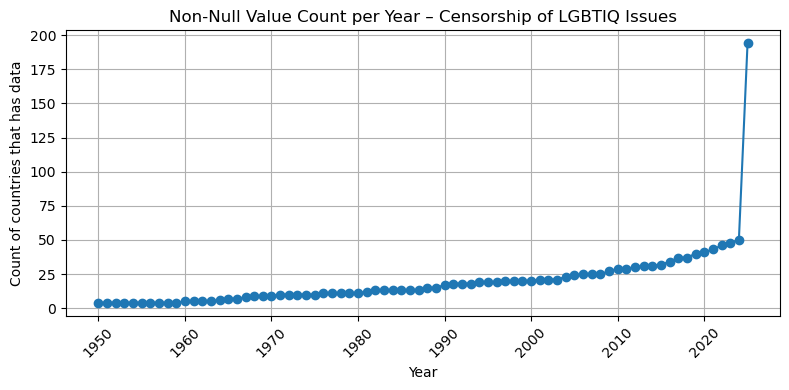

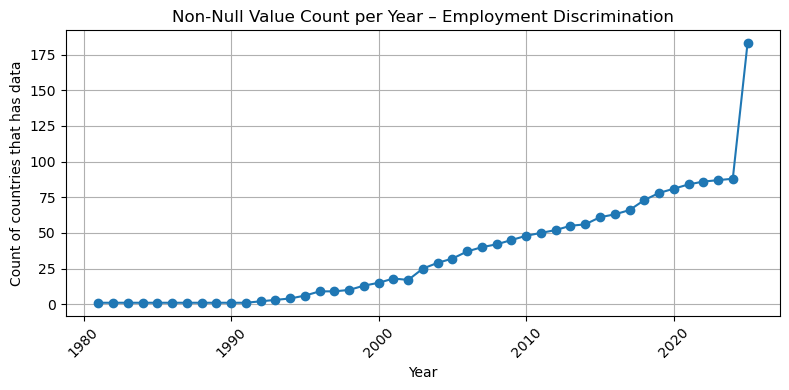

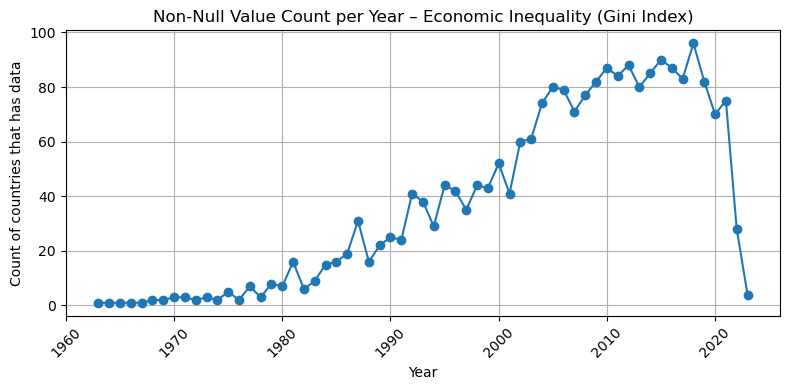

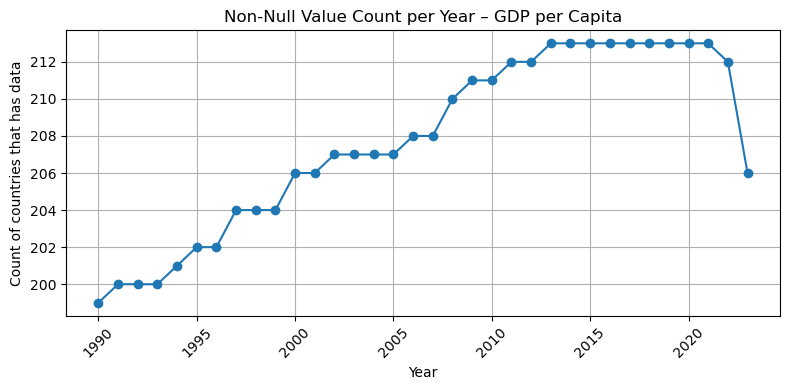

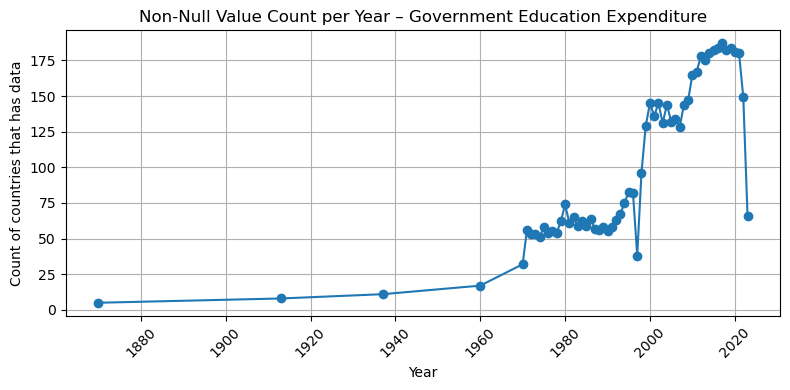

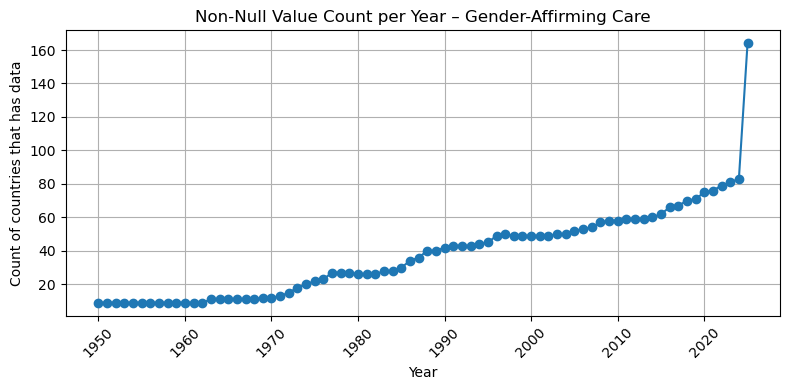

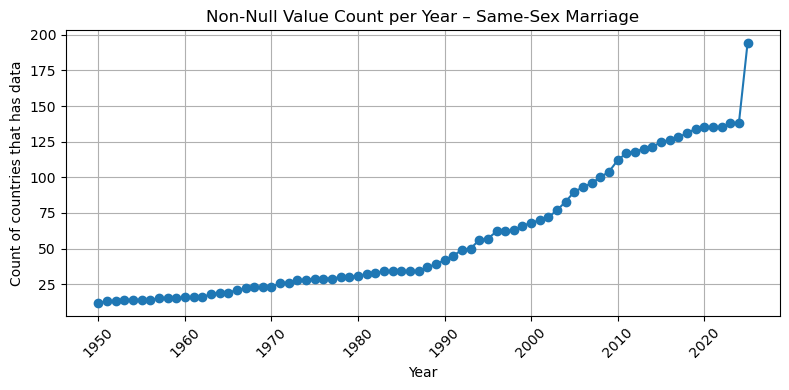

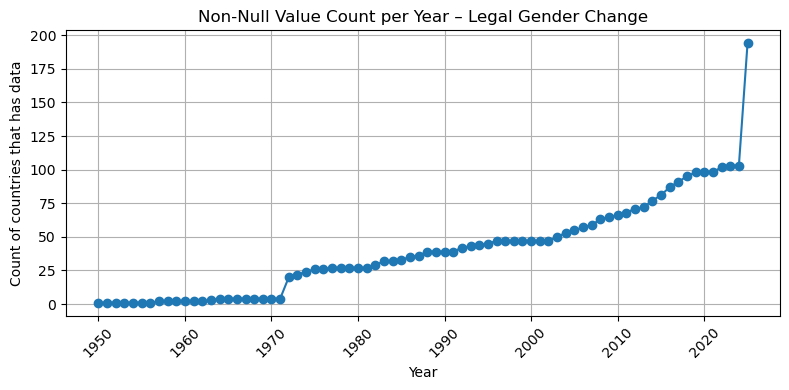

In [3]:
import matplotlib.pyplot as plt

for dataset in df["Dataset"].unique():
    subset = df[df["Dataset"] == dataset]

    if subset["num_countries"].notna().sum() == 0:
        print(f"Skipping {dataset} – all values are null")
        continue

    plt.figure(figsize=(8, 4))
    plt.plot(subset["Year"], subset["num_countries"], marker='o', linestyle='-')
    plt.title(f"Non-Null Value Count per Year – {dataset}")
    plt.xlabel("Year")
    plt.ylabel("Count of countries that has data")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [4]:
## So based on the result, I think after 2000, we have an acceptable number of countries that have data ( all of them at least have 50 coountires after this year with the valid data)
## So I filter the dataset for after 2000, please let me know if you want to change this
## This frame would be our base table for our left join 
## summary_all

In [5]:
## I've noticed that for some csv files. we do not have code, so I just want to left join on Year and Country

columns_to_check = ["Year", "Entity", "Code"]

dataframes = {
    "df_censorship": df_censorship,
    "df_employment_discrimination": df_employment_discrimination,
    "df_gini": df_gini,
    "df_gdp": df_gdp,
    "df_education": df_education,
    "df_gender_care": df_gender_care,
    "df_marriage": df_marriage,
    "df_legal_gender": df_legal_gender,
}

for name, df in dataframes.items():
    print(f"\n{name} - Nulls in Key Columns:")
    for col in columns_to_check:
        if col in df.columns:
            null_count = df[col].isnull().sum()
            print(f"  {col}: {null_count} null(s)")
        else:
            print(f"  {col}: Column not found")


df_censorship - Nulls in Key Columns:
  Year: 0 null(s)
  Entity: 0 null(s)
  Code: 0 null(s)

df_employment_discrimination - Nulls in Key Columns:
  Year: 0 null(s)
  Entity: 0 null(s)
  Code: 0 null(s)

df_gini - Nulls in Key Columns:
  Year: 0 null(s)
  Entity: 0 null(s)
  Code: 133 null(s)

df_gdp - Nulls in Key Columns:
  Year: 0 null(s)
  Entity: 0 null(s)
  Code: 458 null(s)

df_education - Nulls in Key Columns:
  Year: 0 null(s)
  Entity: 0 null(s)
  Code: 428 null(s)

df_gender_care - Nulls in Key Columns:
  Year: 0 null(s)
  Entity: 0 null(s)
  Code: 0 null(s)

df_marriage - Nulls in Key Columns:
  Year: 0 null(s)
  Entity: 0 null(s)
  Code: 0 null(s)

df_legal_gender - Nulls in Key Columns:
  Year: 0 null(s)
  Entity: 0 null(s)
  Code: 0 null(s)


In [6]:
# First, I combined all datasets into one long DataFrame 
## Please notice that stacking all the rows from these datasets on top of each other
all_data = pd.concat([
    df_censorship[["Entity", "Code", "Year"]],
    df_employment_discrimination[["Entity","Code", "Year"]],
    df_gini[["Entity","Code", "Year"]],
    df_gdp[["Entity","Code", "Year"]],
    df_education[["Entity","Code", "Year"]],
    df_gender_care[["Entity","Code", "Year"]],
    df_marriage[["Entity","Code", "Year"]],
    df_legal_gender[["Entity","Code", "Year"]],
], ignore_index=True)

##
## Show rows where 'Code' is null
null_code_rows = all_data[all_data["Code"].isna()]
print(null_code_rows)

                                Entity Code  Year
3108                 Argentina (urban)  NaN  1980
3109                 Argentina (urban)  NaN  1986
3110                 Argentina (urban)  NaN  1987
3111                 Argentina (urban)  NaN  1991
3112                 Argentina (urban)  NaN  1992
...                                ...  ...   ...
18012  Western and Central Africa (WB)  NaN  2018
18013  Western and Central Africa (WB)  NaN  2019
18014  Western and Central Africa (WB)  NaN  2020
18015  Western and Central Africa (WB)  NaN  2021
18016  Western and Central Africa (WB)  NaN  2022

[1019 rows x 3 columns]


In [7]:
import pandas as pd

## Create a mapping from Entity → Code using non-null values
entity_to_code_map = (
    all_data[all_data["Code"].notna()]
    .drop_duplicates(subset="Entity")
    .set_index("Entity")["Code"]
    .to_dict()
)

## Create lists to store matched and unmatched entity names
matched_entities = []
unmatched_entities = []

## Fill missing codes and track matches
def fill_code_and_track(row):
    if pd.isna(row["Code"]):
        matched_code = entity_to_code_map.get(row["Entity"])
        if matched_code is not None:
            matched_entities.append(row["Entity"])
            return matched_code
        else:
            unmatched_entities.append(row["Entity"])
            return None
    return row["Code"]

all_data["Code"] = all_data.apply(fill_code_and_track, axis=1)

## Remove duplicates from tracking lists
matched_entities = sorted(set(matched_entities))
unmatched_entities = sorted(set(unmatched_entities))

print("✅ Finished filling missing Code values.")
print(f"✅ {len(matched_entities)} entities were successfully matched:")
for entity in matched_entities:
    print("  ✓", entity)

print("\n❗ Entities with no Code found:")
for entity in unmatched_entities:
    print("  ✗", entity)

print(f"\n🧮 Remaining rows with missing Code: {all_data['Code'].isna().sum()}")
## As we can see for these countries, we do not have code, please let mw know, what should we do for them 

✅ Finished filling missing Code values.
✅ 0 entities were successfully matched:

❗ Entities with no Code found:
  ✗ Arab World (WB)
  ✗ Argentina (urban)
  ✗ Bolivia (urban)
  ✗ Central Europe and the Baltics (WB)
  ✗ China (rural)
  ✗ China (urban)
  ✗ Colombia (urban)
  ✗ EU (27)
  ✗ East Asia and Pacific (WB)
  ✗ East Asia and the Pacific (WB)
  ✗ Ecuador (urban)
  ✗ Ethiopia (rural)
  ✗ Europe and Central Asia (WB)
  ✗ European Union (27)
  ✗ Faeroe Islands
  ✗ High-income countries
  ✗ Honduras (urban)
  ✗ India (rural)
  ✗ India (urban)
  ✗ Latin America and Caribbean (WB)
  ✗ Low-income countries
  ✗ Lower-middle-income countries
  ✗ Micronesia (country) (urban)
  ✗ Middle East and North Africa (WB)
  ✗ Middle-income countries
  ✗ North America (WB)
  ✗ Rwanda (rural)
  ✗ South Asia (WB)
  ✗ Southern and Eastern Africa (WB)
  ✗ Sub-Saharan Africa (WB)
  ✗ Suriname (urban)
  ✗ Upper-middle-income countries
  ✗ Uruguay (urban)
  ✗ Western and Central Africa (WB)

🧮 Remaining rows 

In [8]:
## So I just created my base table based on Year and Country and filtered it out for Year > 2000  and <= 2023
filtered_data = all_data[(all_data["Year"] > 2000) & (all_data["Year"] <= 2023)]
base_table = filtered_data[["Year", "Entity", "Code"]].drop_duplicates()
base_table = base_table.sort_values(by=["Year", "Entity"]).reset_index(drop=True)
base_table

,Year,Entity,Code
0,2001,Afghanistan,AFG
1,2001,Albania,ALB
2,2001,Algeria,DZA
3,2001,Andorra,AND
4,2001,Angola,AGO
...,...,...,...
5265,2023,Vietnam,VNM
5266,2023,World,OWID_WRL
5267,2023,Yemen,YEM
5268,2023,Zambia,ZMB


In [9]:
merged_wide_df = base_table.copy()
datasets = {
    "censorship": df_censorship,
    "employment": df_employment_discrimination,
    "gini": df_gini,
    "gdp": df_gdp,
    "education": df_education,
    "gendercare": df_gender_care,
    "marriage": df_marriage,
    "legalgender": df_legal_gender,
}


for name, df in datasets.items():

    value_cols = [col for col in df.columns if col not in ["Entity", "Year"]]
    df_renamed = df.rename(columns={col: f"{col}_{name}" for col in value_cols})
    merged_wide_df = merged_wide_df.merge(
        df_renamed,
        on=["Entity", "Year"],
        how="left"
    )

print("Final shape:", merged_wide_df.shape)

Final shape: (5270, 20)


In [10]:
merged_wide_df.head()

,Year,Entity,Code,Code_censorship,Censorship of LGBT+ issues (historical)_censorship,Code_employment,LGBT+ employment discrimination (historical)_employment,Code_gini,Gini coefficient_gini,990179-annotations_gini,Code_gdp,"GDP per capita, PPP (constant 2021 international $)_gdp",Code_education,Public spending on education as a share of GDP_education,Code_gendercare,Gender-affirming care (historical)_gendercare,Code_marriage,Same-sex marriage (historical)_marriage,Code_legalgender,Right to change legal gender (historical)_legalgender
0,2001,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG,1454.1108,NaN,NaN,NaN,NaN,AFG,Banned,NaN,NaN
1,2001,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ALB,7215.8200,ALB,3.4587,NaN,NaN,NaN,NaN,NaN,NaN
2,2001,Algeria,DZA,DZA,Imprisonment as punishment,NaN,NaN,NaN,NaN,NaN,DZA,11742.5950,NaN,NaN,NaN,NaN,DZA,Banned,NaN,NaN
3,2001,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AND,59109.0160,NaN,NaN,AND,Restricted,NaN,NaN,NaN,NaN
4,2001,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AGO,6049.1630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
print("Long format shape:", merged_wide_df.shape)


Long format shape: (5270, 20)


In [12]:
list(merged_wide_df.columns)

['Year',
 'Entity',
 'Code',
 'Code_censorship',
 'Censorship of LGBT+ issues (historical)_censorship',
 'Code_employment',
 'LGBT+ employment discrimination (historical)_employment',
 'Code_gini',
 'Gini coefficient_gini',
 '990179-annotations_gini',
 'Code_gdp',
 'GDP per capita, PPP (constant 2021 international $)_gdp',
 'Code_education',
 'Public spending on education as a share of GDP_education',
 'Code_gendercare',
 'Gender-affirming care (historical)_gendercare',
 'Code_marriage',
 'Same-sex marriage (historical)_marriage',
 'Code_legalgender',
 'Right to change legal gender (historical)_legalgender']

In [13]:
# Drop all columns that start with 'Code_'
merged_wide_df = merged_wide_df.loc[:, ~merged_wide_df.columns.str.contains("Code_")]
list(merged_wide_df.columns)

['Year',
 'Entity',
 'Code',
 'Censorship of LGBT+ issues (historical)_censorship',
 'LGBT+ employment discrimination (historical)_employment',
 'Gini coefficient_gini',
 '990179-annotations_gini',
 'GDP per capita, PPP (constant 2021 international $)_gdp',
 'Public spending on education as a share of GDP_education',
 'Gender-affirming care (historical)_gendercare',
 'Same-sex marriage (historical)_marriage',
 'Right to change legal gender (historical)_legalgender']

In [14]:
exclude_cols = ["Entity", "Year"]
value_cols = merged_wide_df.columns.difference(exclude_cols)
cleaned_long_df = merged_wide_df.dropna(subset=value_cols, how='all').reset_index(drop=True)
print("Shape after cleaning:", cleaned_long_df.shape)
cleaned_long_df


Shape after cleaning: (5270, 12)


,Year,Entity,Code,Censorship of LGBT+ issues (historical)_censorship,LGBT+ employment discrimination (historical)_employment,Gini coefficient_gini,990179-annotations_gini,"GDP per capita, PPP (constant 2021 international $)_gdp",Public spending on education as a share of GDP_education,Gender-affirming care (historical)_gendercare,Same-sex marriage (historical)_marriage,Right to change legal gender (historical)_legalgender
0,2001,Afghanistan,AFG,NaN,NaN,NaN,NaN,1454.1108,NaN,NaN,Banned,NaN
1,2001,Albania,ALB,NaN,NaN,NaN,NaN,7215.8200,3.4587,NaN,NaN,NaN
2,2001,Algeria,DZA,Imprisonment as punishment,NaN,NaN,NaN,11742.5950,NaN,NaN,Banned,NaN
3,2001,Andorra,AND,NaN,NaN,NaN,NaN,59109.0160,NaN,Restricted,NaN,NaN
4,2001,Angola,AGO,NaN,NaN,NaN,NaN,6049.1630,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5265,2023,Vietnam,VNM,NaN,NaN,NaN,NaN,13491.8800,NaN,Legal,Banned,"Legal, surgery required"
5266,2023,World,OWID_WRL,NaN,NaN,NaN,NaN,20670.9410,NaN,NaN,NaN,NaN
5267,2023,Yemen,YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Banned,NaN
5268,2023,Zambia,ZMB,Imprisonment as punishment,NaN,NaN,NaN,3673.4841,NaN,NaN,Banned,NaN


In [15]:
cleaned_long_df.tail()

,Year,Entity,Code,Censorship of LGBT+ issues (historical)_censorship,LGBT+ employment discrimination (historical)_employment,Gini coefficient_gini,990179-annotations_gini,"GDP per capita, PPP (constant 2021 international $)_gdp",Public spending on education as a share of GDP_education,Gender-affirming care (historical)_gendercare,Same-sex marriage (historical)_marriage,Right to change legal gender (historical)_legalgender
5265,2023,Vietnam,VNM,NaN,NaN,NaN,NaN,13491.8800,NaN,Legal,Banned,"Legal, surgery required"
5266,2023,World,OWID_WRL,NaN,NaN,NaN,NaN,20670.9410,NaN,NaN,NaN,NaN
5267,2023,Yemen,YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Banned,NaN
5268,2023,Zambia,ZMB,Imprisonment as punishment,NaN,NaN,NaN,3673.4841,NaN,NaN,Banned,NaN
5269,2023,Zimbabwe,ZWE,Imprisonment as punishment,NaN,NaN,NaN,3442.2512,NaN,NaN,Banned,NaN


In [16]:
print(cleaned_long_df.columns.tolist())


['Year', 'Entity', 'Code', 'Censorship of LGBT+ issues (historical)_censorship', 'LGBT+ employment discrimination (historical)_employment', 'Gini coefficient_gini', '990179-annotations_gini', 'GDP per capita, PPP (constant 2021 international $)_gdp', 'Public spending on education as a share of GDP_education', 'Gender-affirming care (historical)_gendercare', 'Same-sex marriage (historical)_marriage', 'Right to change legal gender (historical)_legalgender']


In [17]:
cleaned_long_df.columns = (
    cleaned_long_df.columns
    .str.replace("Entity", "country", regex=False)
    .str.replace("Year", "year", regex=False)
    .str.replace("Code", "country-code", regex=False)
    .str.replace("Censorship of LGBT+ issues (historical)_censorship", "lgbtq-censorship", regex=False)
    .str.replace("LGBT+ employment discrimination (historical)_employment", "employment-discrimination", regex=False)
    .str.replace("Gini coefficient_gini", "gini-index", regex=False)
    .str.replace("GDP per capita, PPP (constant 2021 international $)_gdp", "gdp-per-capita", regex=False)
    .str.replace("Public spending on education as a share of GDP_education", "education-spending-gdp", regex=False)
    .str.replace("Gender-affirming care (historical)_gendercare", "gender-affirming-care", regex=False)
    .str.replace("Same-sex marriage (historical)_marriage", "same-sex-marriage", regex=False)
    .str.replace("Right to change legal gender (historical)_legalgender", "legal-gender", regex=False)
)


In [18]:
cleaned_long_df

,year,country,country-code,lgbtq-censorship,employment-discrimination,gini-index,990179-annotations_gini,gdp-per-capita,education-spending-gdp,gender-affirming-care,same-sex-marriage,legal-gender
0,2001,Afghanistan,AFG,NaN,NaN,NaN,NaN,1454.1108,NaN,NaN,Banned,NaN
1,2001,Albania,ALB,NaN,NaN,NaN,NaN,7215.8200,3.4587,NaN,NaN,NaN
2,2001,Algeria,DZA,Imprisonment as punishment,NaN,NaN,NaN,11742.5950,NaN,NaN,Banned,NaN
3,2001,Andorra,AND,NaN,NaN,NaN,NaN,59109.0160,NaN,Restricted,NaN,NaN
4,2001,Angola,AGO,NaN,NaN,NaN,NaN,6049.1630,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5265,2023,Vietnam,VNM,NaN,NaN,NaN,NaN,13491.8800,NaN,Legal,Banned,"Legal, surgery required"
5266,2023,World,OWID_WRL,NaN,NaN,NaN,NaN,20670.9410,NaN,NaN,NaN,NaN
5267,2023,Yemen,YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Banned,NaN
5268,2023,Zambia,ZMB,Imprisonment as punishment,NaN,NaN,NaN,3673.4841,NaN,NaN,Banned,NaN


In [19]:
print(cleaned_long_df.dtypes)

year                           int64
country                       object
country-code                  object
lgbtq-censorship              object
employment-discrimination     object
gini-index                   float64
990179-annotations_gini      float64
gdp-per-capita               float64
education-spending-gdp       float64
gender-affirming-care         object
same-sex-marriage             object
legal-gender                  object
dtype: object


In [20]:
float_cols = cleaned_long_df.select_dtypes(include=["float64"]).columns
cleaned_long_df[float_cols] = cleaned_long_df[float_cols].round(2)

In [21]:
eda_summary = pd.DataFrame({
    "Non-Null Count": cleaned_long_df.notnull().sum(),
    "Total Rows": len(cleaned_long_df),
    "Non-Null %": cleaned_long_df.notnull().mean() * 100,
    "Data Type": cleaned_long_df.dtypes
})


eda_summary = eda_summary.sort_values(by="Non-Null Count", ascending=False)
eda_summary["Non-Null %"] = eda_summary["Non-Null %"].round(1)
eda_summary.reset_index(inplace=True)
eda_summary.rename(columns={"index": "Column"}, inplace=True)


eda_summary


,Column,Non-Null Count,Total Rows,Non-Null %,Data Type
0,year,5270,5270,100.0,int64
1,country,5270,5270,100.0,object
2,gdp-per-capita,4841,5270,91.9,float64
3,country-code,4772,5270,90.6,object
4,education-spending-gdp,3601,5270,68.3,float64
5,same-sex-marriage,2560,5270,48.6,object
6,legal-gender,1703,5270,32.3,object
7,gini-index,1664,5270,31.6,float64
8,gender-affirming-care,1414,5270,26.8,object
9,employment-discrimination,1225,5270,23.2,object


In [22]:
## Again Dropping some columns based on Non-Null %
columns_to_drop = ['990179-annotations_gini']
cleaned_long_df = cleaned_long_df.drop(columns=columns_to_drop)

In [23]:
## One more time checking the columns 
eda_summary = pd.DataFrame({
    "Non-Null Count": cleaned_long_df.notnull().sum(),
    "Total Rows": len(cleaned_long_df),
    "Non-Null %": cleaned_long_df.notnull().mean() * 100,
    "Data Type": cleaned_long_df.dtypes
})


eda_summary = eda_summary.sort_values(by="Non-Null Count", ascending=False)
eda_summary["Non-Null %"] = eda_summary["Non-Null %"].round(1)
eda_summary.reset_index(inplace=True)
eda_summary.rename(columns={"index": "Column"}, inplace=True)


eda_summary

,Column,Non-Null Count,Total Rows,Non-Null %,Data Type
0,year,5270,5270,100.0,int64
1,country,5270,5270,100.0,object
2,gdp-per-capita,4841,5270,91.9,float64
3,country-code,4772,5270,90.6,object
4,education-spending-gdp,3601,5270,68.3,float64
5,same-sex-marriage,2560,5270,48.6,object
6,legal-gender,1703,5270,32.3,object
7,gini-index,1664,5270,31.6,float64
8,gender-affirming-care,1414,5270,26.8,object
9,employment-discrimination,1225,5270,23.2,object


In [24]:
print(cleaned_long_df.columns.tolist())

['year', 'country', 'country-code', 'lgbtq-censorship', 'employment-discrimination', 'gini-index', 'gdp-per-capita', 'education-spending-gdp', 'gender-affirming-care', 'same-sex-marriage', 'legal-gender']


In [25]:
#3 Checking for each country, how many missing values we have for each column 
summary = cleaned_long_df.groupby("country").agg(
    total_rows=("country", "size"),
    missing_gdp_per_capita=("gdp-per-capita", lambda x: x.isna().sum()),
    missing_same_sex_marriage=("same-sex-marriage", lambda x: x.isna().sum()),
    missing_legal_gender=("legal-gender", lambda x: x.isna().sum()),
    missing_lgbtq_censorship=("lgbtq-censorship", lambda x: x.isna().sum()),
    missing_employment_discrimination=("employment-discrimination", lambda x: x.isna().sum()),
    missing_gender_affirming_care=("gender-affirming-care", lambda x: x.isna().sum())
)
summary["missing_count"] = (
    summary["missing_gdp_per_capita"]
    + summary["missing_same_sex_marriage"]
    + summary["missing_same_sex_marriage"] 
    + summary["missing_legal_gender"]
    + summary["missing_lgbtq_censorship"]
    + summary["missing_employment_discrimination"]
    + summary["missing_gender_affirming_care"]
    + summary["missing_legal_gender"] 
)

summary_sorted = summary.sort_values("missing_count", ascending=False)
summary_sorted[summary_sorted["missing_count"] > 100]   ###


,total_rows,missing_gdp_per_capita,missing_same_sex_marriage,missing_legal_gender,missing_lgbtq_censorship,missing_employment_discrimination,missing_gender_affirming_care,missing_count
country,,,,,,,,
Western and Central Africa (WB),22,22,22,22,22,22,22,176
Argentina (urban),21,21,21,21,21,21,21,168
EU (27),21,21,21,21,21,21,21,168
Central Europe and the Baltics (WB),21,21,21,21,21,21,21,168
Bermuda,23,0,23,23,23,23,23,161
...,...,...,...,...,...,...,...,...
Sint Maarten (Dutch part),15,0,15,15,15,15,15,105
Albania,23,0,2,23,23,9,23,105
Georgia,23,0,23,0,23,13,23,105


In [26]:
## Based on the top table, some countries have missing values for almost all columns, so we are going to delete them instead of deleting the columns
countries_to_exclude = summary_sorted[summary_sorted["missing_count"] > 100].index.tolist()
cleaned_long_df = cleaned_long_df[~cleaned_long_df["country"].isin(countries_to_exclude)]
cleaned_long_df = cleaned_long_df.reset_index(drop=True)
cleaned_long_df.head()


,year,country,country-code,lgbtq-censorship,employment-discrimination,gini-index,gdp-per-capita,education-spending-gdp,gender-affirming-care,same-sex-marriage,legal-gender
0,2001,Algeria,DZA,Imprisonment as punishment,NaN,NaN,11742.60,NaN,NaN,Banned,NaN
1,2001,Andorra,AND,NaN,NaN,NaN,59109.02,NaN,Restricted,NaN,NaN
2,2001,Argentina,ARG,NaN,NaN,NaN,21066.46,4.83,NaN,NaN,NaN
3,2001,Armenia,ARM,NaN,NaN,0.35,5044.12,2.47,"Legal, but restricted for minors",NaN,"Legal, surgery required"
4,2001,Australia,AUS,Varies by region,NaN,0.33,44667.93,5.22,Legal,NaN,Varies by region


In [27]:
 ## One more time checking the columns 
eda_summary = pd.DataFrame({
    "Non-Null Count": cleaned_long_df.notnull().sum(),
    "Total Rows": len(cleaned_long_df),
    "Non-Null %": cleaned_long_df.notnull().mean() * 100,
    "Data Type": cleaned_long_df.dtypes
})


eda_summary = eda_summary.sort_values(by="Non-Null Count", ascending=False)
eda_summary["Non-Null %"] = eda_summary["Non-Null %"].round(1)
eda_summary.reset_index(inplace=True)
eda_summary.rename(columns={"index": "Column"}, inplace=True)


eda_summary

,Column,Non-Null Count,Total Rows,Non-Null %,Data Type
0,year,2125,2125,100.0,int64
1,country,2125,2125,100.0,object
2,country-code,2094,2125,98.5,object
3,gdp-per-capita,2023,2125,95.2,float64
4,same-sex-marriage,1700,2125,80.0,object
5,education-spending-gdp,1677,2125,78.9,float64
6,legal-gender,1419,2125,66.8,object
7,gini-index,1173,2125,55.2,float64
8,gender-affirming-care,1152,2125,54.2,object
9,employment-discrimination,988,2125,46.5,object


In [28]:
# Desired column order
column_order = [
    "year", "country", "country-code",
    "gdp-per-capita", "education-spending-gdp",
    "same-sex-marriage", "lgbtq-censorship",
    "employment-discrimination", "gender-affirming-care",
    "legal-gender"
]

cleaned_long_df = cleaned_long_df[column_order]

cleaned_long_df.to_csv("../data/clean/globalrights.csv", index=False)
